In [1]:
# Project1-2020-Group#4

# File: Asl_NYC_Data.ipynb

# import python libraries

import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as sts
import numpy as np

import seaborn as sns 
import datetime as dt

%matplotlib inline 
%matplotlib notebook

import warnings


In [2]:
# load dataset into Pandas

# mydata = pd.read_csv('C:\Users\momina\Project1-2020\Input_Files\WaitTime_NYC_Data.csv')
mydata = pd.read_csv('.\Input_Files\WaitTime_NYC_Data.csv')

In [3]:
# Check dataset Info
# mydata.info()

# Display file records
mydata.head(26)

,Date,Time,State,PuFrom,Address,Street
0,2014.07.06,14:30,NY ...,MANHATTAN,50,MURRAY ST
1,2014.07.04,7:15,NY ...,MANHATTAN,143,AVENUE B
2,2014.07.05,5:45,NY ...,MANHATTAN,125,CHRISTOPHER ST
3,2014.07.06,4:30,NY ...,MANHATTAN,217,E 7 ST
4,2014.07.05,7:45,NY ...,MANHATTAN,521,W 26 ST
5,2014.07.06,8:45,NY ...,MANHATTAN,110,BLEECKER ST
6,2014.07.06,6:45,NY ...,MANHATTAN,220,E 57 St
7,2014.07.06,11:30,NY ...,MANHATTAN,440,E 20 ST
8,2014.07.03,12:00,NY ...,QUEENS,2204,119 ST
9,2014.07.03,13:00,NY ...,MANHATTAN,286,E 10 ST


In [4]:
df1 = mydata.join(pd.DataFrame(mydata.Date.str.split('.').tolist(),columns=['Year','Month','Day']))
#df1 = df1.applymap(lambda x: x.strip())
df1

,Date,Time,State,PuFrom,Address,Street,Year,Month,Day
0,2014.07.06,14:30,NY ...,MANHATTAN,50,MURRAY ST,2014,07,06
1,2014.07.04,7:15,NY ...,MANHATTAN,143,AVENUE B,2014,07,04
2,2014.07.05,5:45,NY ...,MANHATTAN,125,CHRISTOPHER ST,2014,07,05
3,2014.07.06,4:30,NY ...,MANHATTAN,217,E 7 ST,2014,07,06
4,2014.07.05,7:45,NY ...,MANHATTAN,521,W 26 ST,2014,07,05
...,...,...,...,...,...,...,...,...,...
194987,2014.09.28,21:50,JFK DELTA TERM 4 P/U AREA C ...,Jfk,,,2014,09,28
194988,2014.09.28,7:00,NY ...,MANHATTAN,112,W 78 ST,2014,09,28
194989,2014.09.28,15:30,NY ...,MANHATTAN,601,W 57 ST,2014,09,28
194990,2014.09.28,19:55,JFK DELTA TERM 2 CURBSIDE ...,NaN,,,2014,09,28


In [5]:
df2 = mydata.join(pd.DataFrame(mydata.Time.str.split(':',1).tolist(),columns=['Hour','Min']))
df2

,Date,Time,State,PuFrom,Address,Street,Hour,Min
0,2014.07.06,14:30,NY ...,MANHATTAN,50,MURRAY ST,14,30
1,2014.07.04,7:15,NY ...,MANHATTAN,143,AVENUE B,7,15
2,2014.07.05,5:45,NY ...,MANHATTAN,125,CHRISTOPHER ST,5,45
3,2014.07.06,4:30,NY ...,MANHATTAN,217,E 7 ST,4,30
4,2014.07.05,7:45,NY ...,MANHATTAN,521,W 26 ST,7,45
...,...,...,...,...,...,...,...,...
194987,2014.09.28,21:50,JFK DELTA TERM 4 P/U AREA C ...,Jfk,,,21,50
194988,2014.09.28,7:00,NY ...,MANHATTAN,112,W 78 ST,7,00
194989,2014.09.28,15:30,NY ...,MANHATTAN,601,W 57 ST,15,30
194990,2014.09.28,19:55,JFK DELTA TERM 2 CURBSIDE ...,NaN,,,19,55


In [6]:
df_0 = pd.merge(df1,df2, on=('Date','Time','State','PuFrom','Address','Street')).drop_duplicates()
df_1 = df_0.loc[:, ['Year','Month','Day','Hour','Min','State','PuFrom']]
df_Clean = df_1.sort_values(by = ['Year','Month','Day','Hour','Min'])
df_Clean

,Year,Month,Day,Hour,Min,State,PuFrom
75996,2014,07,01,0,00,NY ...,MANHATTAN
85379,2014,07,01,0,00,NY ...,MANHATTAN
96873,2014,07,01,0,00,NY ...,MANHATTAN
139967,2014,07,01,0,01,NY ...,MANHATTAN
96404,2014,07,01,0,05,NY ...,MANHATTAN
...,...,...,...,...,...,...,...
198268,2014,09,30,9,45,NY ...,MANHATTAN
144165,2014,09,30,9,49,LGA SOUTHWEST AIRLINES MIDDLE ISLAND ...,LGA
141087,2014,09,30,9,50,LGA UNITED Pick-up Island ...,NaN
107857,2014,09,30,9,54,LGA UNITED Pick-up Island ...,NaN


In [7]:
# replacing na values in PuFrom with 'Airport'
df_Clean['PuFrom'].fillna('Airport', inplace = True) 
  
df_Clean

,Year,Month,Day,Hour,Min,State,PuFrom
75996,2014,07,01,0,00,NY ...,MANHATTAN
85379,2014,07,01,0,00,NY ...,MANHATTAN
96873,2014,07,01,0,00,NY ...,MANHATTAN
139967,2014,07,01,0,01,NY ...,MANHATTAN
96404,2014,07,01,0,05,NY ...,MANHATTAN
...,...,...,...,...,...,...,...
198268,2014,09,30,9,45,NY ...,MANHATTAN
144165,2014,09,30,9,49,LGA SOUTHWEST AIRLINES MIDDLE ISLAND ...,LGA
141087,2014,09,30,9,50,LGA UNITED Pick-up Island ...,Airport
107857,2014,09,30,9,54,LGA UNITED Pick-up Island ...,Airport


In [8]:
len(df_1["PuFrom"].unique())

1265

In [9]:
len(df_1["State"].unique())

1001

In [11]:
search_values = ['NY','JFK','LGA', 'Airport']
df_Pi = df_Clean[df_1.State.str.contains('|'.join(search_values ))]
df_Pi.head(26)

C:\Users\momina\.conda\envs\PythonData2020_1\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


,Year,Month,Day,Hour,Min,State,PuFrom
75996,2014,07,01,0,00,NY ...,MANHATTAN
85379,2014,07,01,0,00,NY ...,MANHATTAN
96873,2014,07,01,0,00,NY ...,MANHATTAN
139967,2014,07,01,0,01,NY ...,MANHATTAN
96404,2014,07,01,0,05,NY ...,MANHATTAN
141206,2014,07,01,0,05,JFK AMERICAN DOMESTIC Pickup Area C ...,Airport
8391,2014,07,01,0,06,JFK UNITED DOMESTIC Pickup Area A ...,Airport
32339,2014,07,01,0,07,NY ...,MANHATTAN
16356,2014,07,01,0,12,NY ...,MANHATTAN
57715,2014,07,01,0,12,NY ...,MANHATTAN


In [14]:
#PU_Data = mydata.groupby(["Date","PuFrom"])["Time"].sum()
#df_g1 = df_1.groupby(['Month','Day','Hour'])["State" in "NY"].count()
#df_g1.head(26)
#PU_Data = mydata.groupby(["Date","PU_Hr","PuFrom"])["State"].sum()
#PU_Data

#df_g0 = df_Pi.groupby(['Month','Day','Hour'])["State"].count().reset_index(name="Trip_Count")

df_g0 = df_Pi.groupby(['Month','Day','Hour'])["PuFrom"].count().reset_index(name="Trip_Count")
df_Trips = print(df_g0)
df_Trips

     Month Day Hour  Trip_Count
0       07  01    0          36
1       07  01    1          10
2       07  01   10          98
3       07  01   11          92
4       07  01   12          98
...    ...  ..  ...         ...
2200    09  30    5          88
2201    09  30    6          98
2202    09  30    7          85
2203    09  30    8          83
2204    09  30    9          84

[2205 rows x 4 columns]


<IPython.core.display.Javascript object>


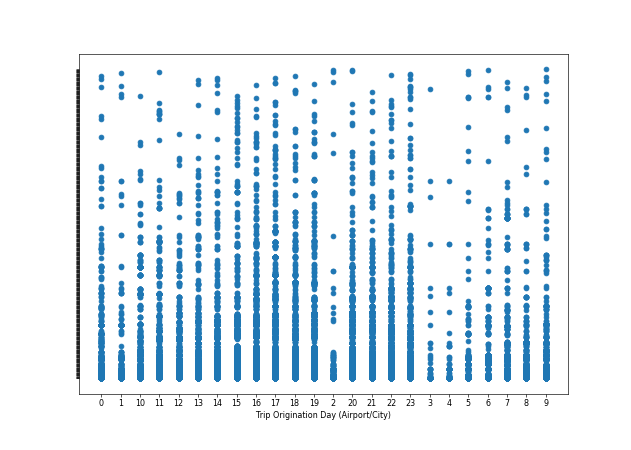

In [15]:
plt.close('all')

# Determine which pairs of factors are correlated. 
plt.scatter(df_Pi.iloc[:,3],df_Pi.iloc[:,5])
plt.xlabel('Trip Origination Day (Airport/City)')
plt.ylabel('Trip Origination Hour')
plt.show()

In [16]:
# gca stands for 'get current axis'
ax = plt.gca()

df_Trips.plot(kind='line',x='Month',y='Hour',ax=ax)
df_Trips.plot(kind='line',x='Month',y='Trip_Count', color='red', ax=ax)

df_Trips.plt.show()

AttributeError: 'NoneType' object has no attribute 'plot'

In [17]:
df_Bar = pd.DataFrame([2][3])
df_Bar.plot(kind='bar')

IndexError: list index out of range

In [ ]:
plt.hist(df_g0)
plt.xlabel('Day')
plt.ylabel('Count')
plt.show()
print(sts.normaltest(df_g0.sample(50)))

In [ ]:
df_pc1 = df_1.groupby(['Month','Day','Hour'])["State"].sum()
df_NY = df_pc1["State" == "NY"]
len(df_NY)

In [ ]:
df_Airport = df_pc1["State" != "NY"]
len(df_Airport)

In [ ]:
# Box Plot for NY-Trips
df_NYbox = df_NY["State"]
fig1, ax1 = plt.subplots()
ax1.set_title('Uber - 2014 July-Aug-Sep NY City Trips')
ax1.set_ylabel('Trips')
ax1.boxplot(df_NYbox)
plt.show()